In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [29]:
# Data sets division and normalisation
data = pd.read_csv("advertising.csv")
y_data = data['Clicked on Ad']
# dropping of text columns 
x_data = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'],axis = 1)
print(x_data.head())
# Z-score normalisation of data 
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_data)
# note here that x_norm is an numpy array
print(x_norm)
x_train = x_norm[0:800]
x_test = x_norm[800:1000]
y_train = y_data[0:800]
y_test = y_data[800:1000]

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                     68.95   35     61833.90                256.09     0
1                     80.23   31     68441.85                193.77     1
2                     69.47   26     59785.94                236.50     0
3                     74.15   29     54806.18                245.89     1
4                     68.37   35     73889.99                225.58     0
[[ 0.24926659 -0.11490498  0.50969109  1.73403    -0.96269532]
 [ 0.96113227 -0.57042523  1.00253021  0.31380538  1.03875025]
 [ 0.28208309 -1.13982553  0.35694859  1.28758905 -0.96269532]
 ...
 [-0.84377541  1.707176   -0.93857029 -1.35892388  1.03875025]
 [-0.59638946 -1.93698596 -0.97548353  0.18117208 -0.96269532]
 [-1.26155474 -1.13982553 -1.87383208 -0.0376045  -0.96269532]]


In [30]:
lr = LogisticRegression(random_state=0).fit(x_train, y_train)
print(lr)
print(f"number of iterations completed: {lr.n_iter_}")

LogisticRegression(random_state=0)
number of iterations completed: [13]


In [31]:
# Let us get the weights and bias 
b_norm = lr.intercept_
w_norm = lr.coef_
print(b_norm)
print(w_norm)
y_pred_train = lr.predict(x_train)

[1.48923733]
[[-2.76964024  1.20453465 -1.69853495 -2.57895629 -0.27787628]]


In [32]:
# Let us predict for our test data 
y_predict = lr.predict(x_test)
# Let us calculate accuracy on test data 
y_absolute = np.absolute(y_test - y_predict)
accuracy = ((len(y_predict) - np.sum(y_absolute))/len(y_predict))*100
print(f"Accuracy on our test data in percentage is : {accuracy}")

Accuracy on our test data in percentage is : 96.0


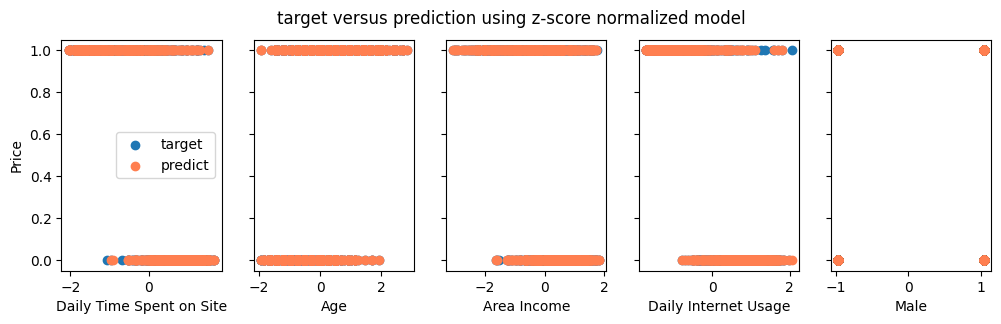

In [34]:
X_features = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']
fig,ax = plt.subplots(1,5,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(x_train[:,i],y_pred_train,color = 'coral', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()